## Import

### Libraries

In [0]:
import pandas as pd
import numpy as np 
import seaborn as sns 
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as ss

### Data

In [0]:
# Read from url
url = 'https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2014/results.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,71.40,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,116.37,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,67.42,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,116.37,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,67.83,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


## Data pre-processing

In [4]:
df.count()

10k          31984
name         31984
division     31984
25k          31984
gender       31984
age          31984
official     31984
bib          31984
genderdiv    31984
ctz           1244
35k          31984
overall      31984
pace         31984
state        29408
30k          31984
5k           31984
half         31984
20k          31984
country      31984
city         31983
40k          31984
dtype: int64

In [0]:
# Drop ctz column: ony 10% rows have this value
df.drop(['ctz'], axis = 1, inplace = True)

# Drop name column and bib column (every athlete has a different number)
df.drop(['name', 'bib'], axis = 1, inplace = True)

# Only keep country column, drop city column and state column
df.drop(['city', 'state'], axis = 1, inplace = True)


# Convert '-' to NaN
df.replace('-', np.nan, inplace = True)

# Remove duplicate row and row that contains NaN value
df.dropna(inplace = True)
df.drop_duplicates(inplace = True)

In [0]:
# Correct dtype of columns
df['5k'] = df['5k'].astype('float')
df['10k'] = df['10k'].astype('float')
df['15k'] = df['20k'].astype('float')
df['20k'] = df['25k'].astype('float')
df['25k'] = df['30k'].astype('float')
df['30k'] = df['35k'].astype('float')
df['35k'] = df['40k'].astype('float')
df['40k'] = df['40k'].astype('float')
df['half'] = df['half'].astype('float')


In [0]:
# Apply label encoder to Gender column
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

In [8]:
df.dtypes

10k          float64
division       int64
25k          float64
gender         int64
age            int64
official     float64
genderdiv      int64
35k          float64
overall        int64
pace         float64
30k          float64
5k           float64
half         float64
20k          float64
country       object
40k          float64
15k          float64
dtype: object

## Data analysis

In [9]:
df.head()

,10k,division,25k,gender,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,country,40k,15k
0,17.37,8,59.18,1,47,85.25,8,80.43,8,3.27,71.40,8.02,39.72,47.67,JPN,80.43,37.65
1,32.58,1,99.33,0,33,138.95,1,132.10,21,5.30,116.37,16.22,69.47,82.43,KEN,132.10,65.83
2,16.62,1,56.45,1,41,80.60,1,76.10,1,3.08,67.42,7.75,38.03,45.80,RSA,76.10,36.10
3,32.57,3,99.33,0,24,140.58,3,132.95,27,5.37,116.37,16.20,69.47,82.43,ETH,132.95,65.83
4,17.12,2,57.03,1,40,81.23,2,76.72,2,3.10,67.83,8.02,38.60,46.37,JPN,76.72,36.58


In [10]:
# Basic stats
df.describe()

,10k,division,25k,gender,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k,15k
count,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000
mean,51.629039,1922.747291,163.894883,0.552435,42.385067,241.952383,8002.921988,228.189990,15833.958924,9.236463,196.033373,25.678261,111.211481,133.581175,228.189990,105.321404
std,8.710102,1704.843679,32.889354,0.497251,11.299795,50.842552,4733.255987,48.074493,9182.223743,1.939150,40.775036,4.215381,20.306387,25.571480,48.074493,19.159500
min,16.620000,1.000000,56.450000,0.000000,18.000000,80.600000,1.000000,76.100000,1.000000,3.080000,67.420000,7.750000,38.030000,45.800000,76.100000,36.100000
25%,45.370000,607.000000,140.520000,0.000000,33.000000,205.300000,3940.000000,193.620000,7880.000000,7.830000,166.950000,22.620000,96.750000,115.430000,193.620000,91.670000
50%,50.280000,1418.000000,157.500000,1.000000,42.000000,231.980000,7919.000000,218.470000,15829.000000,8.850000,187.850000,25.050000,107.680000,128.850000,218.470000,102.000000
75%,57.000000,2601.000000,182.200000,1.000000,50.000000,272.200000,11893.000000,256.570000,23785.000000,10.380000,219.370000,28.400000,122.680000,147.700000,256.570000,116.150000
max,112.380000,6979.000000,376.380000,1.000000,81.000000,538.880000,17575.000000,508.350000,31931.000000,20.570000,449.330000,86.950000,236.670000,289.020000,508.350000,224.350000


In [11]:
# Check Correlation
df.corr()

,10k,division,25k,gender,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k,15k
10k,1.000000,0.475172,0.959731,-0.277523,0.168658,0.925291,0.801329,0.929413,0.907153,0.925290,0.943640,0.990872,0.984986,0.973714,0.929413,0.986353
division,0.475172,1.000000,0.505915,-0.123736,-0.576451,0.519383,0.471173,0.521891,0.514791,0.519413,0.515269,0.473961,0.487076,0.496968,0.521891,0.486645
25k,0.959731,0.505915,1.000000,-0.250064,0.157736,0.981220,0.841520,0.984647,0.937995,0.981226,0.993964,0.936346,0.987553,0.995406,0.984647,0.986107
gender,-0.277523,-0.123736,-0.250064,1.000000,0.208804,-0.205366,0.169511,-0.212243,-0.246231,-0.205396,-0.231503,-0.273923,-0.273097,-0.265205,-0.212243,-0.274634
age,0.168658,-0.576451,0.157736,0.208804,1.000000,0.167319,0.307467,0.161233,0.201185,0.167300,0.158180,0.159966,0.165972,0.159475,0.161233,0.165471
official,0.925291,0.519383,0.981220,-0.205366,0.167319,1.000000,0.882599,0.999293,0.959718,0.999994,0.993007,0.902963,0.956504,0.968168,0.999293,0.954395
genderdiv,0.801329,0.471173,0.841520,0.169511,0.307467,0.882599,1.000000,0.877441,0.908184,0.882605,0.860217,0.789251,0.817770,0.826229,0.877441,0.815914
35k,0.929413,0.521891,0.984647,-0.212243,0.161233,0.999293,0.877441,1.000000,0.957724,0.999290,0.995451,0.906984,0.960609,0.972147,1.000000,0.958565
overall,0.907153,0.514791,0.937995,-0.246231,0.201185,0.959718,0.908184,0.957724,1.000000,0.959736,0.949005,0.893247,0.922732,0.928506,0.957724,0.921453
pace,0.925290,0.519413,0.981226,-0.205396,0.167300,0.999994,0.882605,0.999290,0.959736,1.000000,0.993011,0.902956,0.956508,0.968173,0.999290,0.954398


## Data visualization

In [0]:
df_ = df.copy() #Backup df

# Drop country column for PCA
df_visual = df_.copy()
df_pca = df_visual.drop(['country'], axis = 1)

In [0]:
#Standar Scaler
from sklearn.preprocessing import StandardScaler

df_pca = StandardScaler().fit_transform(df_pca)

In [14]:
#PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_pca)
df_principal = pd.DataFrame(data = pca_result, columns = ['Principal component 1', 'Principal component 2'])

df_visual['Principal component 1'] = df_principal['Principal component 1']
df_visual['Principal component 2'] = df_principal['Principal component 2']

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.79428328 0.10152762]


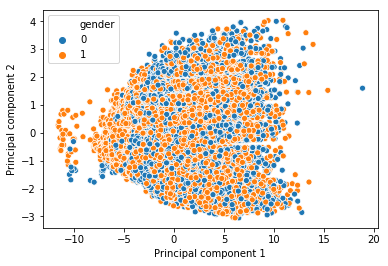

In [15]:
sns.scatterplot(x = 'Principal component 1', y = 'Principal component 2', hue = 'gender', data = df_visual)

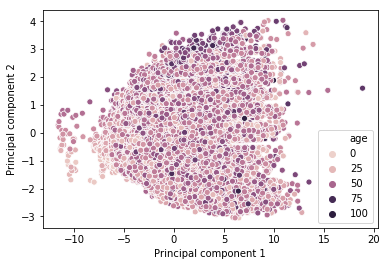

In [16]:
sns.scatterplot(x = 'Principal component 1', y = 'Principal component 2', hue = 'age', data = df_visual)

## Clustering

### One-hot encoding

In [0]:
# One-hot encoding for country column
df = pd.concat([df, pd.get_dummies(df['country'], prefix='country',dummy_na=True)],axis=1).drop(['country'],axis=1)

In [18]:
df.head()

,10k,division,25k,gender,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k,15k,country_ARG,country_AUS,country_AUT,country_BAH,country_BAR,country_BEL,country_BER,country_BLR,country_BOL,country_BRA,country_BRN,country_CAN,country_CAY,country_CHI,country_CHN,country_COL,country_CRC,country_CRO,country_CZE,country_DEN,country_DOM,country_ECU,country_EGY,country_ESA,...,country_ISR,country_ITA,country_JPN,country_KEN,country_KOR,country_LIE,country_LUX,country_MAR,country_MAS,country_MEX,country_NED,country_NOR,country_NZL,country_PAN,country_PER,country_PHI,country_POL,country_POR,country_QAT,country_ROU,country_RSA,country_RUS,country_SIN,country_SLO,country_SUI,country_SVK,country_SWE,country_TAN,country_THA,country_TPE,country_TRI,country_TUR,country_UAE,country_UKR,country_URU,country_USA,country_VEN,country_VGB,country_ZIM,country_nan
0,17.37,8,59.18,1,47,85.25,8,80.43,8,3.27,71.40,8.02,39.72,47.67,80.43,37.65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,32.58,1,99.33,0,33,138.95,1,132.10,21,5.30,116.37,16.22,69.47,82.43,132.10,65.83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,16.62,1,56.45,1,41,80.60,1,76.10,1,3.08,67.42,7.75,38.03,45.80,76.10,36.10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,32.57,3,99.33,0,24,140.58,3,132.95,27,5.37,116.37,16.20,69.47,82.43,132.95,65.83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.12,2,57.03,1,40,81.23,2,76.72,2,3.10,67.83,8.02,38.60,46.37,76.72,36.58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### K-means

In [0]:
from sklearn.cluster import KMeans

clustering = KMeans(n_clusters=2, random_state=0)

clustering.fit(df)
df_visual['Centroid'] = clustering.labels_

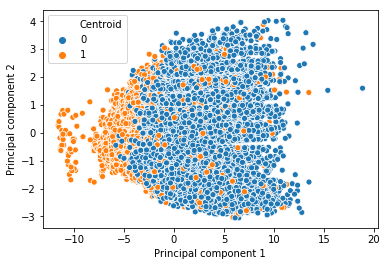

In [20]:
sns.scatterplot(x = 'Principal component 1', y = 'Principal component 2', hue = 'Centroid', data = df_visual)

### DBSCAN

In [0]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN()

clustering.fit(df)
df_visual['Centroid'] = clustering.labels_

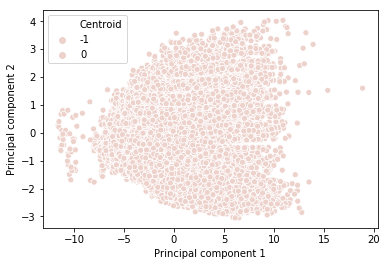

In [28]:
sns.scatterplot(x = 'Principal component 1', y = 'Principal component 2', hue = 'Centroid', data = df_visual)